In [1]:
%load_ext dotenv
%reload_ext dotenv
%dotenv

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
import sys
from os.path import dirname

UTILS_PATH=os.environ.get('REPO') + "/notebooks/commons"
sys.path.append(dirname(UTILS_PATH))

from commons import check_args, gen_paths, coordinates_bounds

In [4]:
def compare_box_plot(df, x, y):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(2,1,1)
    sns.boxplot(data=df, x=x, y=y, ax=ax)

    ax = fig.add_subplot(2,1,2)
    sns.boxplot(data=df, x=x, y=y, ax=ax, showfliers=False)
    
def compare_box_vs_violin_plot(df, x, y):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(2,1,1)
    sns.boxplot(data=df, x=x, y=y, ax=ax, showfliers=False)

    ax = fig.add_subplot(2,1,2)
    sns.violinplot(data=df, x=x, y=y, ax=ax)
    
def compare_box_dist(df, label):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(3,1,1)
    sns.distplot(df[label])

    ax = fig.add_subplot(3,1,2)
    sns.boxplot(df[label], ax=ax)
    
    ax = fig.add_subplot(3,1,3)
    sns.boxplot(df[label], ax=ax, showfliers=False)

In [5]:
def get_normalized_price_by_max(df, price="price"):
    df = df.copy()
    
    df_prices = df[["estrato", price]].groupby("estrato").agg(lambda e: e.max())
    df_prices = df_prices.reset_index()
    df_prices.loc[:, "max_price"] = df_prices[price]
    df_prices = df_prices.drop([price], axis=1)
    
    df_estratos = pd.merge(df_prices, df)
    df_estratos.loc[:, "norm_price_by_max"] = \
        df_estratos.apply(lambda e: e[price]/e["max_price"], axis=1)
    return df_estratos

In [6]:
def upper_interquartile_distance(df):
    q1 = np.quantile(df, .25)
    q3 = np.quantile(df, .75)
    return q3 + 1.5*(q3 - q1)

def get_normalized_price_by_tipical(df, price="price"):
    df = df.copy()
    
    df_prices = df[["estrato", price]].groupby("estrato").agg(upper_interquartile_distance)
    df_prices = df_prices.reset_index()
    df_prices.loc[:, "normal_price"] = df_prices[price]
    df_prices = df_prices.drop([price], axis=1)

    df_estratos = pd.merge(df_prices, df)
    
    df_estratos = df_estratos.loc[df_estratos[price] <= df_estratos["normal_price"]]
    df_estratos.loc[:, "norm_price_by_stat"] = \
        df_estratos.apply(lambda e: e[price]/e["normal_price"], axis=1)

    return df_estratos

In [7]:
def plot_price_vs_discrete_value(df, label, showfliers=True):
    plt.figure(figsize=(16,10))
    features = ['rooms','baths','garages', "antiguedad"]
    for i,f in enumerate(features):
        plt.subplot(2,2,i+1)
        sns.boxplot(x=f ,y=label, data=df, showfliers=showfliers)
        plt.title(f'{f}')

In [8]:
def load_posts(input_path):
    df = pd.read_parquet(input_path)
    return df

In [9]:
if __name__ == "__main__":
    city = "manizales"
    property_type = "casas"
    post_type = "arriendo"
    
    #city, property_type, post_type = check_args()
    base_path = os.environ.get('REPO')
    
    raw_path, clean_path = gen_paths(city, property_type, post_type)
    
    raw_path = base_path + raw_path
    clean_path = base_path + clean_path

In [10]:
MSG = """
Hay {} publicaciones de {} en total
"""

posts = load_posts(clean_path)
print(MSG.format(posts.shape[0], post_type))
posts.head()


Hay 99 publicaciones de arriendo en total



,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,estrato,antiguedad,fid,city,property_type,post_type,price_m2
0,486.0,4.0,4.0,0.0,4.86,5.068640,"Área de 486 mtrs, 4 baños, cocina sencilla, cu...",-75.517929,Manizales CENTRO,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,4.0,16 a 30,3078558,manizales,casas,arriendo,0.010000
1,110.0,3.0,3.0,0.0,4.00,5.062479,"Área de 110 mtrs, 3 alcobas, 3 closet, 3 baños...",-75.495445,Manizales EL TRIANGULO,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,6.0,16 a 30,3497615,manizales,casas,arriendo,0.036364
2,1.0,5.0,4.0,0.0,3.00,5.058675,"5 alcobas, closet, 4 baños, sala comedor, coci...",-75.488083,Manizales PALOGRANDE,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,6.0,16 a 30,5619086,manizales,casas,arriendo,3.000000
3,330.0,7.0,4.0,0.0,3.00,5.068990,"Para comercial consta de 7 alcobas, 4 baños, c...",-75.517342,Manizales centro,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,4.0,desconocido,5594083,manizales,casas,arriendo,0.009091
4,120.0,4.0,3.0,1.0,1.55,5.035938,Administra Bienes Raíces ofrece amplia e ilumi...,-75.469330,Manizales San Marcel,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,6.0,desconocido,4430438,manizales,casas,arriendo,0.012917


### Distribución variables continuas

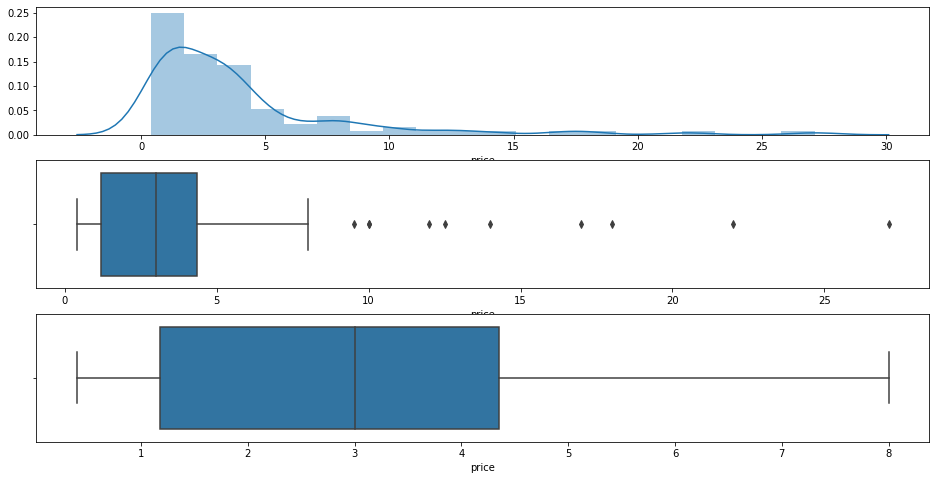

In [11]:
compare_box_dist(posts, "price")

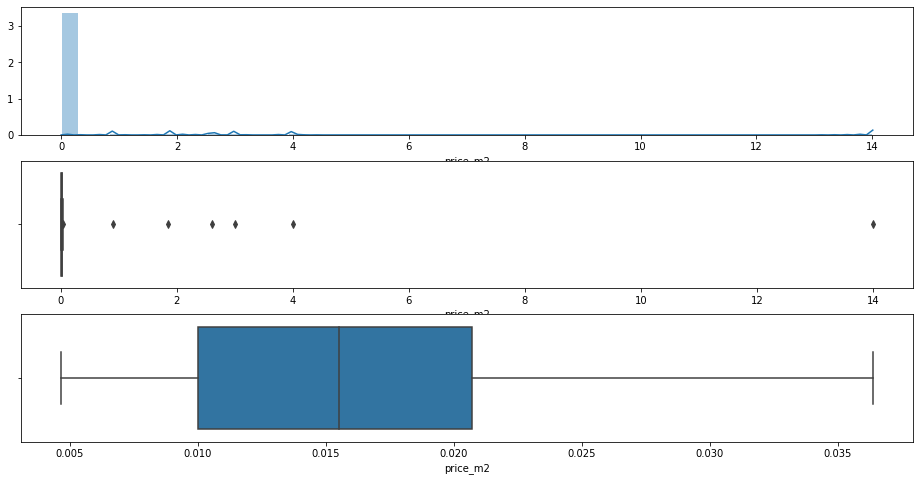

In [12]:
compare_box_dist(posts, "price_m2")

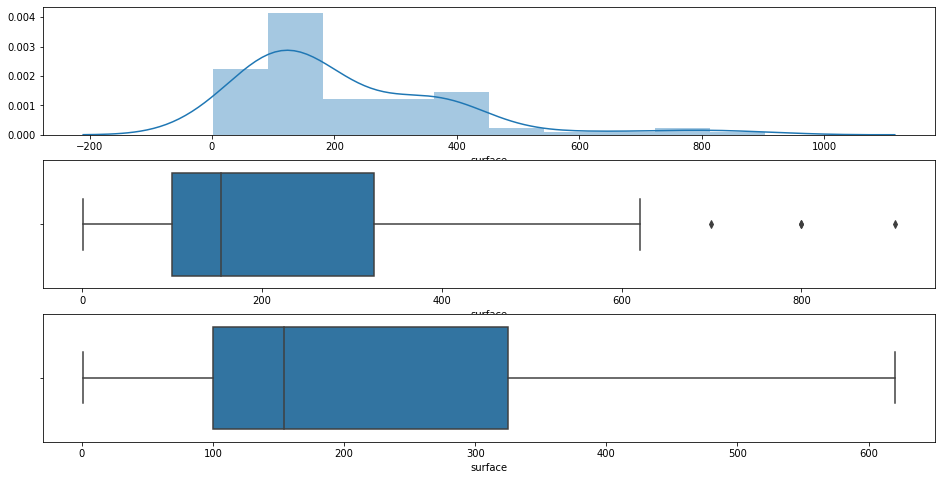

In [13]:
compare_box_dist(posts, "surface")

### Distribución precio por varibles discreta

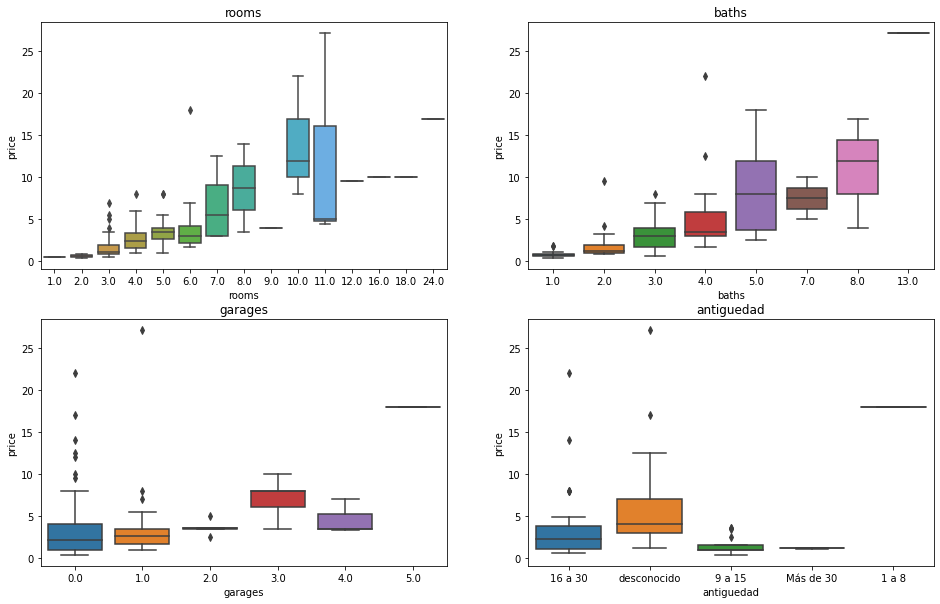

In [14]:
plot_price_vs_discrete_value(posts, "price")

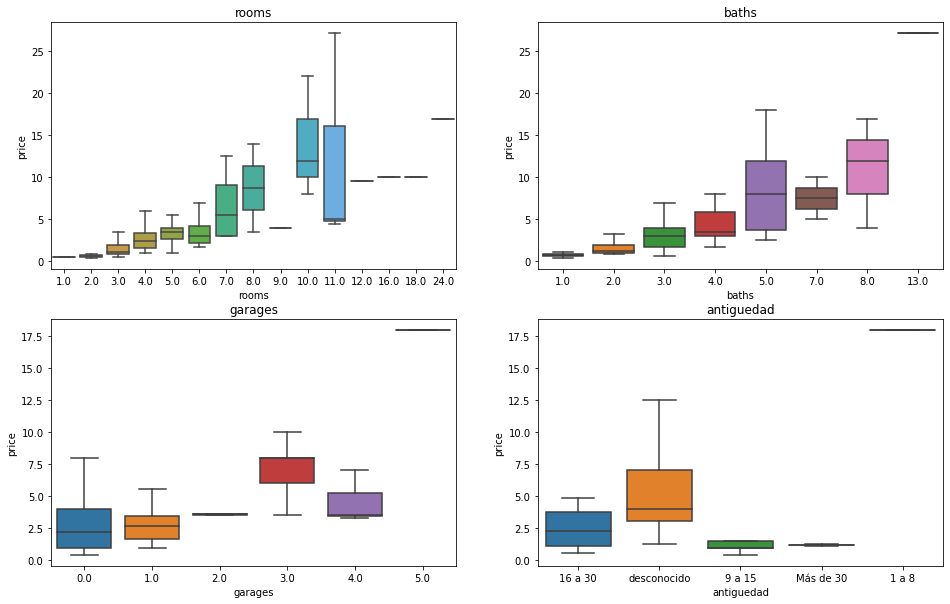

In [15]:
plot_price_vs_discrete_value(posts, "price", showfliers=False)

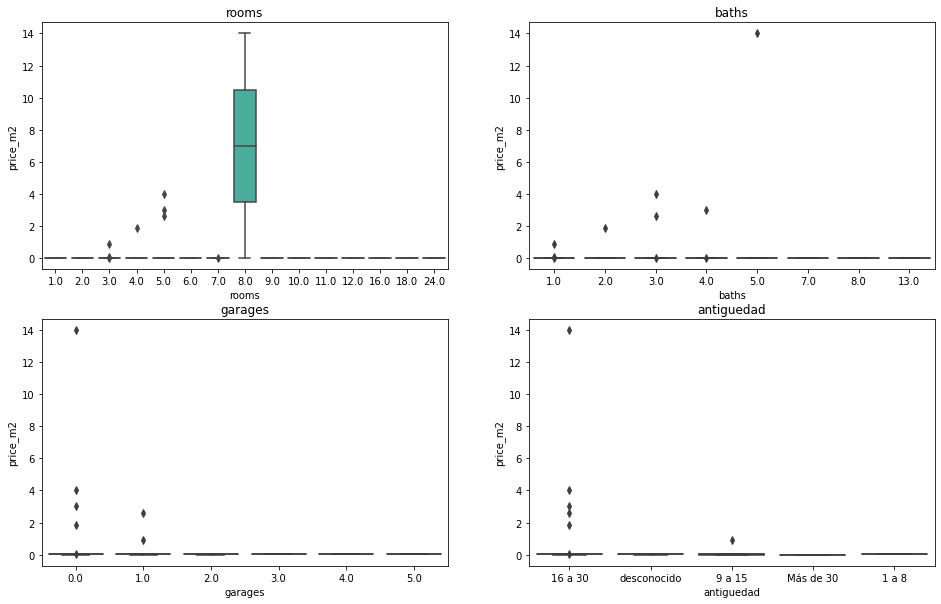

In [16]:
plot_price_vs_discrete_value(posts, "price_m2")

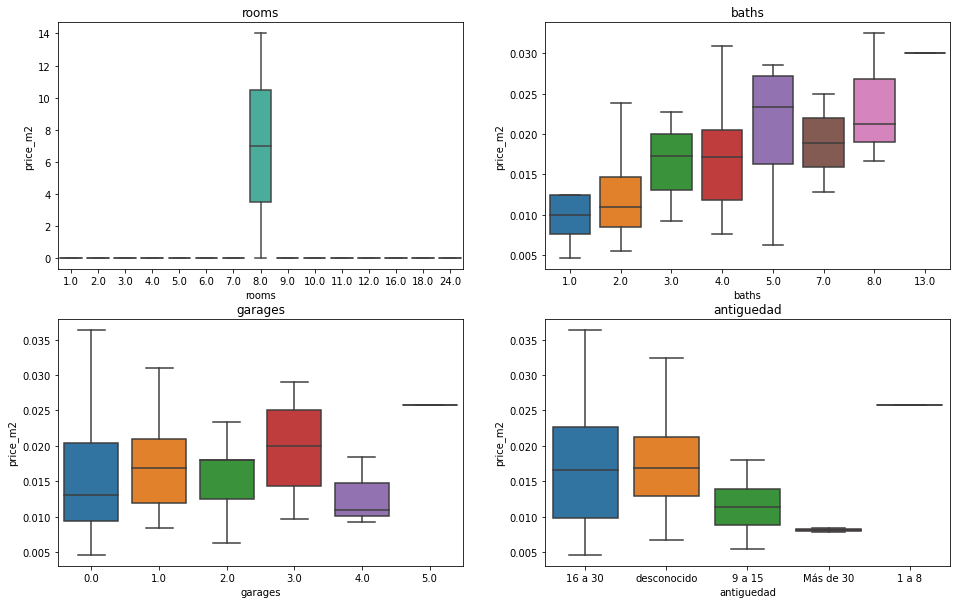

In [17]:
plot_price_vs_discrete_value(posts, "price_m2", showfliers=False)

,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2
estrato,,,,,,,,,,,,,,,,,
1.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3.0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
4.0,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
5.0,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
6.0,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52


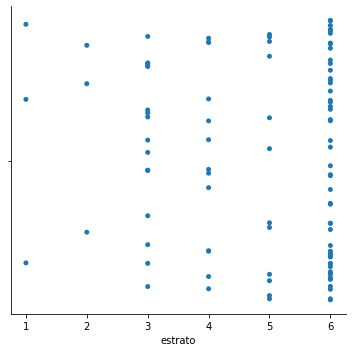

In [18]:
## Numero de muestras por estrato

sns.catplot(data=posts, x="estrato")
posts.groupby("estrato").count()

### Distribución del precio discriminado por estrato

Se verifica la forma del histograma de las variables continuas clasificadas por estrato

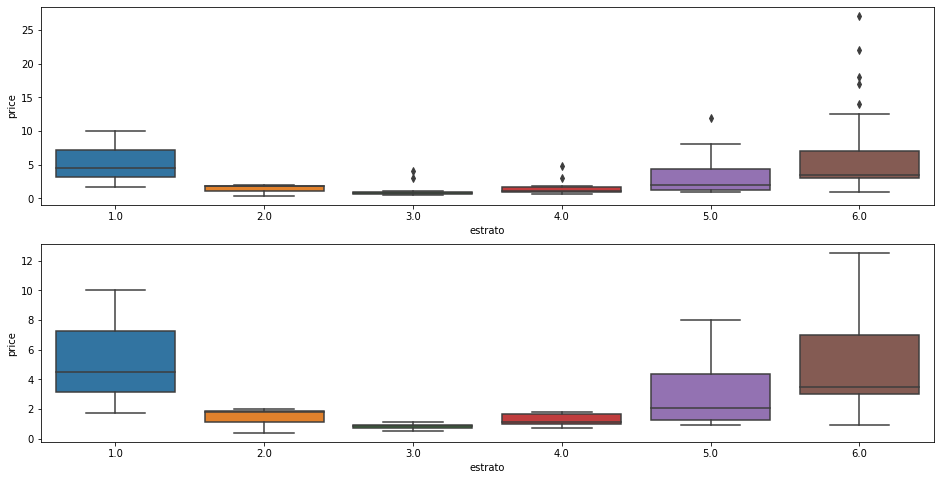

In [19]:
compare_box_plot(posts, "estrato", "price")

#### Se normalizan los precion por estrato

La idea es observar si la distribución de los precios es similar entre los estratos luego de normalizar los precios

In [20]:
normalized_price = get_normalized_price_by_max(posts)
normalized_price.head()

,estrato,max_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_max
0,1.0,10.0,350.0,18.0,5.0,0.0,10.000,5.062300,"Casa comercial con amplios espacios, la cual c...",-75.494820,Manizales centro,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,desconocido,5575616,manizales,casas,arriendo,0.028571,1.0000
1,1.0,10.0,200.0,6.0,4.0,1.0,1.737,5.064100,"Área de 200 mtrs, 6 Alcobas, Closet, 4 Baños, ...",-75.517380,Manizales PALERMO,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,5504692,manizales,casas,arriendo,0.008685,0.1737
2,1.0,10.0,250.0,5.0,3.0,0.0,4.500,5.068118,"279-14589 ÁREA DE 250 MTRS, 3 BANOS, COCINA SE...",-75.518280,Manizales VERSALLES,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,2631210,manizales,casas,arriendo,0.018000,0.4500
3,2.0,2.0,54.0,2.0,1.0,0.0,0.400,5.091370,"Casa con excelente ubicación, buena iluminació...",-75.546356,Manizales la linda,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,9 a 15,5658335,manizales,casas,arriendo,0.007407,0.2000
4,2.0,2.0,40.0,3.0,1.0,0.0,1.800,5.055699,"Área de 45 mtrs, 3 alcobas, un baño, sala come...",-75.529549,Manizales CORREGIMIENTO 3 LA CABAA,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,3153647,manizales,casas,arriendo,0.045000,0.9000


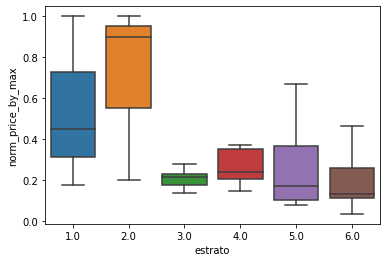

In [21]:
sns.boxplot(data=normalized_price, x="estrato", y="norm_price_by_max", showfliers=False)

#### Se normalizan los precios descartando valores atipicos

Se prueba normalizando sin los valores atipicos

In [22]:
normalized_price = get_normalized_price_by_tipical(posts)
normalized_price.head()

,estrato,normal_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_stat
0,1.0,13.44725,350.0,18.0,5.0,0.0,10.000,5.062300,"Casa comercial con amplios espacios, la cual c...",-75.494820,Manizales centro,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,desconocido,5575616,manizales,casas,arriendo,0.028571,0.743646
1,1.0,13.44725,200.0,6.0,4.0,1.0,1.737,5.064100,"Área de 200 mtrs, 6 Alcobas, Closet, 4 Baños, ...",-75.517380,Manizales PALERMO,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,5504692,manizales,casas,arriendo,0.008685,0.129171
2,1.0,13.44725,250.0,5.0,3.0,0.0,4.500,5.068118,"279-14589 ÁREA DE 250 MTRS, 3 BANOS, COCINA SE...",-75.518280,Manizales VERSALLES,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,2631210,manizales,casas,arriendo,0.018000,0.334641
3,2.0,3.10000,54.0,2.0,1.0,0.0,0.400,5.091370,"Casa con excelente ubicación, buena iluminació...",-75.546356,Manizales la linda,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,9 a 15,5658335,manizales,casas,arriendo,0.007407,0.129032
4,2.0,3.10000,40.0,3.0,1.0,0.0,1.800,5.055699,"Área de 45 mtrs, 3 alcobas, un baño, sala come...",-75.529549,Manizales CORREGIMIENTO 3 LA CABAA,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,3153647,manizales,casas,arriendo,0.045000,0.580645


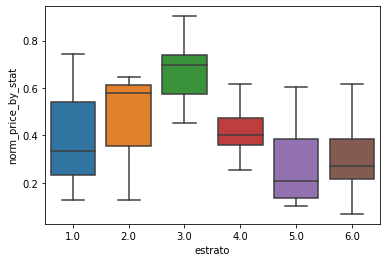

In [23]:
sns.boxplot(data=normalized_price, x="estrato", y="norm_price_by_stat", showfliers=False)

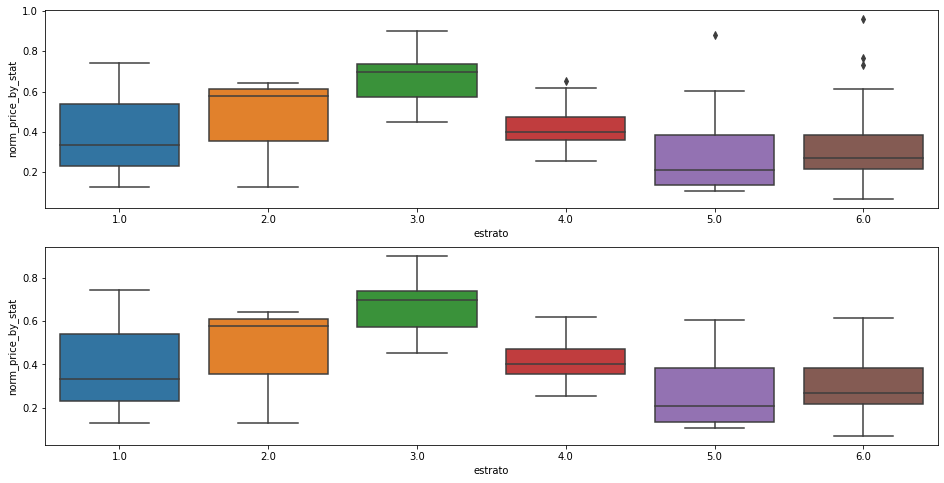

In [24]:
compare_box_plot(normalized_price, "estrato", "norm_price_by_stat")

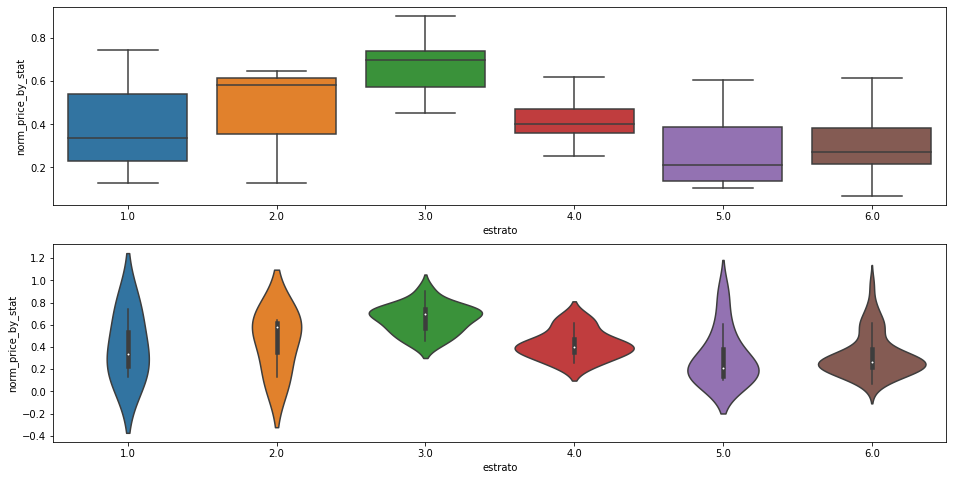

In [25]:
compare_box_vs_violin_plot(normalized_price, "estrato", "norm_price_by_stat")

### Distribución del precio del metro cuadrado discriminado por estrato

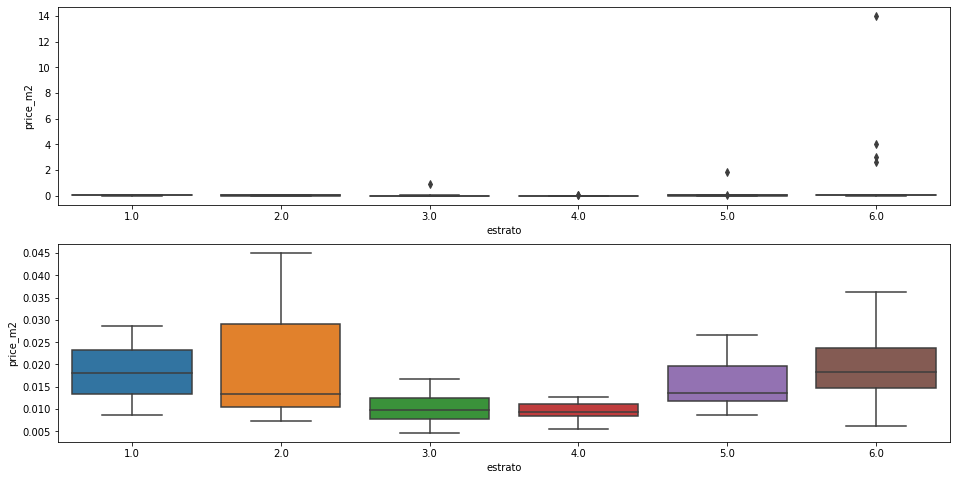

In [26]:
compare_box_plot(posts, "estrato", "price_m2")

#### Se normalizan los precion por estrato

La idea es observar si la distribución de los precios es similar entre los estratos luego de normalizar los precios

In [27]:
normalized_price_m2 = get_normalized_price_by_max(posts, price="price_m2")
normalized_price_m2.head()

,estrato,max_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_max
0,1.0,0.028571,350.0,18.0,5.0,0.0,10.000,5.062300,"Casa comercial con amplios espacios, la cual c...",-75.494820,Manizales centro,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,desconocido,5575616,manizales,casas,arriendo,0.028571,1.000000
1,1.0,0.028571,200.0,6.0,4.0,1.0,1.737,5.064100,"Área de 200 mtrs, 6 Alcobas, Closet, 4 Baños, ...",-75.517380,Manizales PALERMO,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,5504692,manizales,casas,arriendo,0.008685,0.303975
2,1.0,0.028571,250.0,5.0,3.0,0.0,4.500,5.068118,"279-14589 ÁREA DE 250 MTRS, 3 BANOS, COCINA SE...",-75.518280,Manizales VERSALLES,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,2631210,manizales,casas,arriendo,0.018000,0.630000
3,2.0,0.045000,54.0,2.0,1.0,0.0,0.400,5.091370,"Casa con excelente ubicación, buena iluminació...",-75.546356,Manizales la linda,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,9 a 15,5658335,manizales,casas,arriendo,0.007407,0.164609
4,2.0,0.045000,40.0,3.0,1.0,0.0,1.800,5.055699,"Área de 45 mtrs, 3 alcobas, un baño, sala come...",-75.529549,Manizales CORREGIMIENTO 3 LA CABAA,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,3153647,manizales,casas,arriendo,0.045000,1.000000


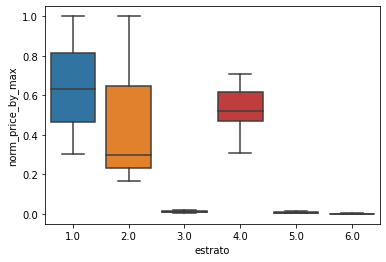

In [28]:
sns.boxplot(data=normalized_price_m2, x="estrato", y="norm_price_by_max", showfliers=False)

#### Se normalizan los precios descartando valores atipicos

Se prueba normalizando sin los valores atipicos

In [29]:
normalized_price_m2 = get_normalized_price_by_tipical(posts, price="price_m2")
normalized_price_m2.head()

,estrato,normal_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_stat
0,1.0,0.038201,350.0,18.0,5.0,0.0,10.000,5.062300,"Casa comercial con amplios espacios, la cual c...",-75.494820,Manizales centro,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,desconocido,5575616,manizales,casas,arriendo,0.028571,0.747933
1,1.0,0.038201,200.0,6.0,4.0,1.0,1.737,5.064100,"Área de 200 mtrs, 6 Alcobas, Closet, 4 Baños, ...",-75.517380,Manizales PALERMO,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,5504692,manizales,casas,arriendo,0.008685,0.227353
2,1.0,0.038201,250.0,5.0,3.0,0.0,4.500,5.068118,"279-14589 ÁREA DE 250 MTRS, 3 BANOS, COCINA SE...",-75.518280,Manizales VERSALLES,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,2631210,manizales,casas,arriendo,0.018000,0.471198
3,2.0,0.057361,54.0,2.0,1.0,0.0,0.400,5.091370,"Casa con excelente ubicación, buena iluminació...",-75.546356,Manizales la linda,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,9 a 15,5658335,manizales,casas,arriendo,0.007407,0.129136
4,2.0,0.057361,40.0,3.0,1.0,0.0,1.800,5.055699,"Área de 45 mtrs, 3 alcobas, un baño, sala come...",-75.529549,Manizales CORREGIMIENTO 3 LA CABAA,https://www.fincaraiz.com.co/casa-en-arriendo/...,0.0,16 a 30,3153647,manizales,casas,arriendo,0.045000,0.784504


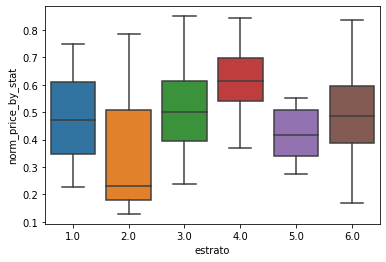

In [30]:
sns.boxplot(data=normalized_price_m2, x="estrato", y="norm_price_by_stat", showfliers=False)

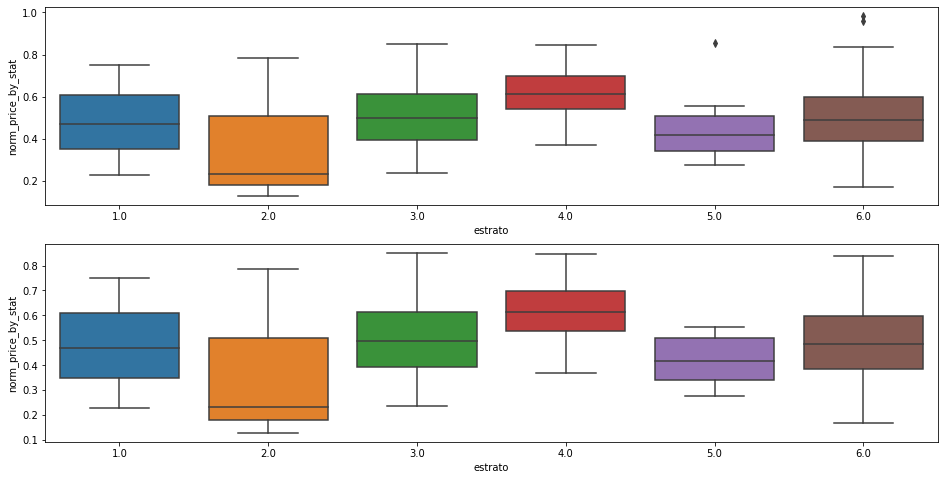

In [31]:
compare_box_plot(normalized_price_m2, "estrato", "norm_price_by_stat")

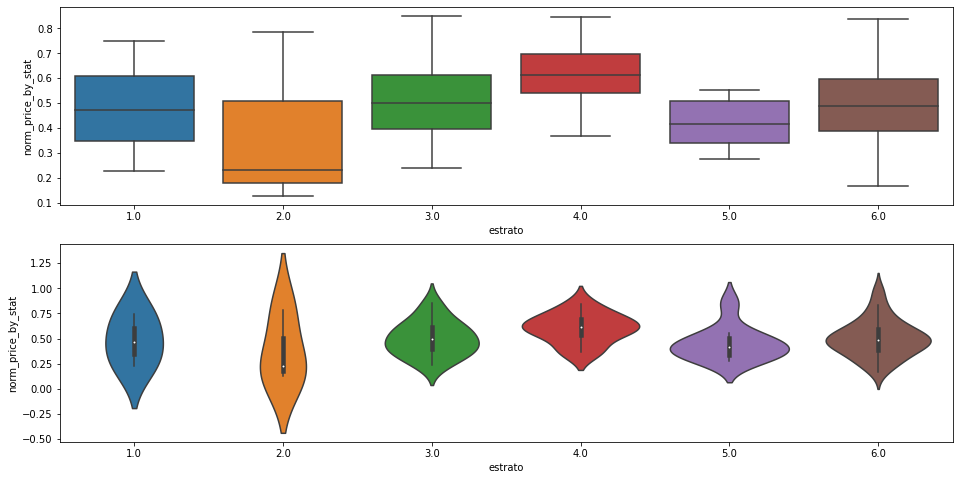

In [32]:
compare_box_vs_violin_plot(normalized_price_m2, "estrato", "norm_price_by_stat")